# Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Data Preprocessing

## Loading the dataset and preprocessing vgsales.csv

In [2]:
df_vgsales = pd.read_csv("C:/Users/Chetan Vemula/Desktop/VS Code Python/Steam_Games_Prediction_And_Recommendation/Datasets/vgsales.csv")
df_vgsales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
nan_count_vgsales = df_vgsales.isna().sum()
print(nan_count_vgsales)

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [4]:
df_vgsales.dropna(inplace=True)
df_vgsales

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


## Removing inactive developers from vgsales.csv using df_developer dataset


In [5]:
df_developer = pd.read_csv("C:/Users/Chetan Vemula/Desktop/VS Code Python/Steam_Games_Prediction_And_Recommendation/Datasets/developper.csv", encoding = 'latin-1')
df_developer

,Developer,Active,City,Autonomous area,Country,Est.,"Notable games, series or franchises",Notes
0,0verflow,1,Tokyo,NaN,Japan,1997,School DaysSummer DaysCross Days,Visual Novel brand (both developer and publisher)
1,11 bit studios,1,Warsaw,NaN,Poland,2010,Frostpunk,Indie developer/publisher
2,1C Company,1,Moscow,NaN,Russia,1991,King's Bounty: Warriors of the North,Game localization. The game development subsid...
3,1-Up Studio,1,Tokyo,NaN,Japan,2000,Mother 3,Subsidiary of Nintendo
4,2K Czech,0,Brno,NaN,Czech Republic,1997,MafiaMafia II,Former subsidiary of 2K Games; previously know...
...,...,...,...,...,...,...,...,...
655,ZeniMax Online Studios,1,Hunt Valley,Maryland,US,2007,The Elder Scrolls Online,Subsidiary of ZeniMax Media Inc
656,Zipper Interactive,0,Redmond,Washington,US,1995,SOCOM U.S. Navy SEALs seriesMechWarrior 3,Shut down in 2012 by Sony Computer Entertainment
657,Zombie Studios,0,Seattle,Washington,US,1994,Spec Ops: Rangers Lead the WayBlacklight: Retr...,NaN
658,ZootFly,0,Ljubljana,NaN,Slovenia,2002,Marlow Briggs and the Mask of Death,Acquired by Elektroncek


In [6]:
inactive_developers = df_developer[df_developer['Active'] == 0]['Developer'].tolist()



In [7]:
# 2. Filter df_vgsales to remove inactive developers
df_vgsales_active = df_vgsales[~df_vgsales['Developer'].isin(inactive_developers)]
# (Notice the '~' for negation to remove the inactive ones)

# Print the DataFrame of active developers
df_vgsales_active

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


## Developer Evaluation

In [8]:
from sklearn.preprocessing import StandardScaler


In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def evaluate_developer_by_name(df_vgsales_active, developer_name):
    """Evaluates a video game developer based on critic scores and counts."""

    # Filter for the specified developer
    developer_df = df_vgsales_active[df_vgsales_active['Developer'] == developer_name]

    # Check if developer exists
    if developer_df.empty:
        return "Developer not found in the dataset."

    # Calculate mean critic score and count
    critic_scores = developer_df['Critic_Score']
    critic_counts = developer_df['Critic_Count']
    score_mean = critic_scores.mean()
    count_mean = critic_counts.mean()

    # Create DataFrame with mean values
    df = pd.DataFrame({'Critic_Score': [score_mean], 'Critic_Count': [count_mean]})

    # Calculate standard deviation for threshold calculation (Not used for scaling)
    score_std = critic_scores.std()
    count_std = critic_counts.std()

    # Define thresholds
    score_threshold_low = score_mean - score_std
    score_threshold_high = score_mean + score_std
    count_threshold_low = count_mean - count_std  # You can adjust this threshold

    # Standardization (Not strictly necessary for a single data point, but kept for consistency)
    scaler = StandardScaler()
    scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=['Scaled_Score', 'Scaled_Count'])

    # Evaluate developer (using the helper function)
    evaluation_result = evaluate_developer(scaled_df['Scaled_Score'][0], scaled_df['Scaled_Count'][0],
                                          score_threshold_low, score_threshold_high, count_threshold_low)

    return evaluation_result


# Define evaluation functions (unchanged)
def evaluate_score(score, score_threshold_low, score_threshold_high):
  if score < score_threshold_low:
    return "Bad"
  elif score > score_threshold_high:
    return "Good"
  else:
    return "Neutral"

def evaluate_count(count, count_threshold_low):
  return "Reliable" if count >= count_threshold_low else "Unreliable"

def evaluate_developer(scaled_score, scaled_count, score_threshold_low, score_threshold_high, count_threshold_low):
  score_evaluation = evaluate_score(scaled_score, score_threshold_low, score_threshold_high)
  count_evaluation = evaluate_count(scaled_count, count_threshold_low)
  return f"The developer has a '{count_evaluation.lower()} {score_evaluation.lower()} score'."



# Get developer name input
developer_name = input("Enter developer name: ")

# Evaluate the developer
evaluation_result = evaluate_developer_by_name(df_vgsales_active, developer_name)
print(evaluation_result)


The developer has a 'unreliable bad score'.


## Graph

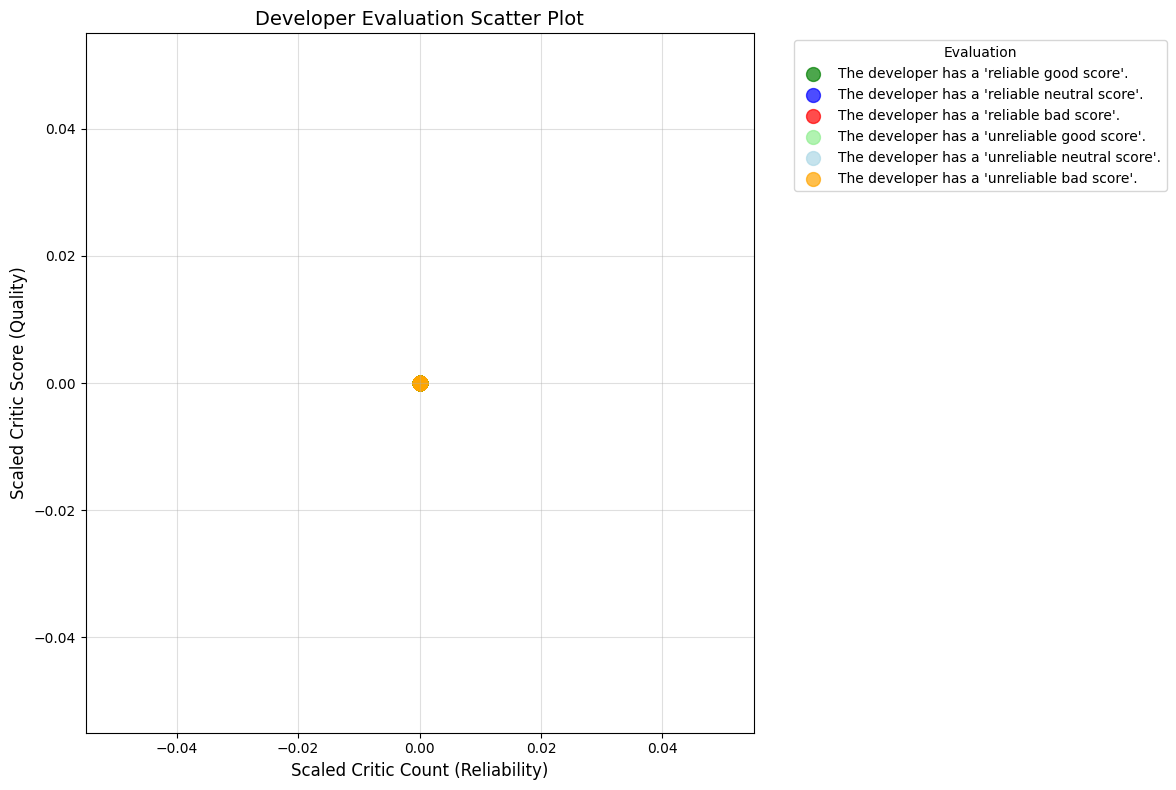

In [10]:
import matplotlib.pyplot as plt
import numpy as np #importing numpy library


def plot_developer_evaluation_scatter(df_vgsales_active):
    """Creates a scatter plot of developers with their evaluation results."""

    developer_data = []

    # Iterate through unique developers
    for developer_name in df_vgsales_active['Developer'].unique():
        # Evaluate the developer
        evaluation_result = evaluate_developer_by_name(df_vgsales_active, developer_name)

        # Extract scaled score and count from evaluation result
        if evaluation_result != "Developer not found in the dataset.":
            developer_df = df_vgsales_active[df_vgsales_active['Developer'] == developer_name]
            critic_scores = developer_df['Critic_Score']
            critic_counts = developer_df['Critic_Count']
            df = pd.DataFrame({'Critic_Score': [critic_scores.mean()], 'Critic_Count': [critic_counts.mean()]})

            # Calculate standard deviation (for threshold calculation, not scaling)
            score_std = critic_scores.std() if len(critic_scores) > 1 else 0  # Handle single game case
            count_std = critic_counts.std() if len(critic_counts) > 1 else 0

            # Define thresholds (you might want to adjust these)
            score_threshold_low = critic_scores.mean() - 0.5 * score_std
            score_threshold_high = critic_scores.mean() + 0.5 * score_std
            count_threshold_low = critic_counts.mean() - 0.5 * count_std

            # Apply standardization
            scaler = StandardScaler()
            scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=['Scaled_Score', 'Scaled_Count'])

            # Append developer data to the list
            developer_data.append({
                'Developer': developer_name,
                'Scaled_Score': scaled_df['Scaled_Score'][0],
                'Scaled_Count': scaled_df['Scaled_Count'][0],
                'Evaluation': evaluation_result
            })

    # Create DataFrame from developer data
    developer_data_df = pd.DataFrame(developer_data)

    # Map evaluation results to colors for the scatter plot
    evaluation_colors = {
        "The developer has a 'reliable good score'.": 'green',
        "The developer has a 'reliable neutral score'.": 'blue',
        "The developer has a 'reliable bad score'.": 'red',
        "The developer has a 'unreliable good score'.": 'lightgreen',
        "The developer has a 'unreliable neutral score'.": 'lightblue',
        "The developer has a 'unreliable bad score'.": 'orange',
    }

    # Create scatter plot
    plt.figure(figsize=(12, 8))
    for evaluation, color in evaluation_colors.items():
        subset = developer_data_df[developer_data_df['Evaluation'] == evaluation]
        plt.scatter(subset['Scaled_Count'], subset['Scaled_Score'], c=color, label=evaluation, s=100, alpha=0.7)

    # Set title and labels
    plt.title('Developer Evaluation Scatter Plot', fontsize=14)
    plt.xlabel('Scaled Critic Count (Reliability)', fontsize=12)
    plt.ylabel('Scaled Critic Score (Quality)', fontsize=12)
    plt.legend(title='Evaluation', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Add gridlines for better readability
    plt.grid(alpha=0.4)
    plt.tight_layout()
    plt.show()

plot_developer_evaluation_scatter(df_vgsales_active)


## Saving the model

In [11]:
import pickle

In [12]:
# File path for saving/loading the configuration
config_file = 'Publisher_Model.sav'

def save_evaluation_config(config, filename):
    """Saves the evaluation configuration to a pickle file."""
    with open(filename, 'wb') as f:
        pickle.dump(config, f)

def load_evaluation_config(filename):
    """Loads the evaluation configuration from a pickle file."""
    with open(filename, 'rb') as f:
        config = pickle.load(f)
    return config

In [13]:
# Create a dictionary to store the evaluation functions and thresholds
evaluation_config = {
    'evaluate_developer_by_name': evaluate_developer_by_name,
    'evaluate_score': evaluate_score,
    'evaluate_count': evaluate_count,
    'evaluate_developer': evaluate_developer,
    'score_threshold_low': None,  # These will be set dynamically later
    'score_threshold_high': None,
    'count_threshold_low': None
}


# Calculate thresholds (can be set dynamically)
score_threshold_low = df_vgsales_active['Critic_Score'].mean() - df_vgsales_active['Critic_Score'].std()
score_threshold_high = df_vgsales_active['Critic_Score'].mean() + df_vgsales_active['Critic_Score'].std()
count_threshold_low = df_vgsales_active['Critic_Count'].mean() - df_vgsales_active['Critic_Count'].std()

# Assign thresholds to the dictionary
evaluation_config['score_threshold_low'] = score_threshold_low
evaluation_config['score_threshold_high'] = score_threshold_high
evaluation_config['count_threshold_low'] = count_threshold_low

# Save the configuration
save_evaluation_config(evaluation_config, config_file)

In [14]:
# Loading the saved model and using it

# Load the configuration
loaded_config = load_evaluation_config(config_file)

# Extract functions and thresholds from the loaded config
evaluate_developer_by_name = loaded_config['evaluate_developer_by_name']
# ... (load other functions and thresholds if needed) ...

# Get developer name input
developer_name = input("Enter developer name: ")

# Evaluate the developer using the loaded configuration
evaluation_result = evaluate_developer_by_name(df_vgsales_active, developer_name)

print(evaluation_result)

The developer has a 'unreliable bad score'.
